In [12]:
import analysis
import pandas as pd
import numpy as np
import scipy.signal as sg
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

%matplotlib inline

In [13]:
data = pd.read_csv('/media/labrat/395Mount/FSL_work/SH/SH_031_05052017_EDITS.txt', sep='\t', names=['Time', 'O2', 'CO2'],
                 usecols=['Time', 'O2', 'CO2'], index_col=False)

In [14]:
filtered_data = analysis.fourier_filter(data.Time[1], data.O2, 3,25)

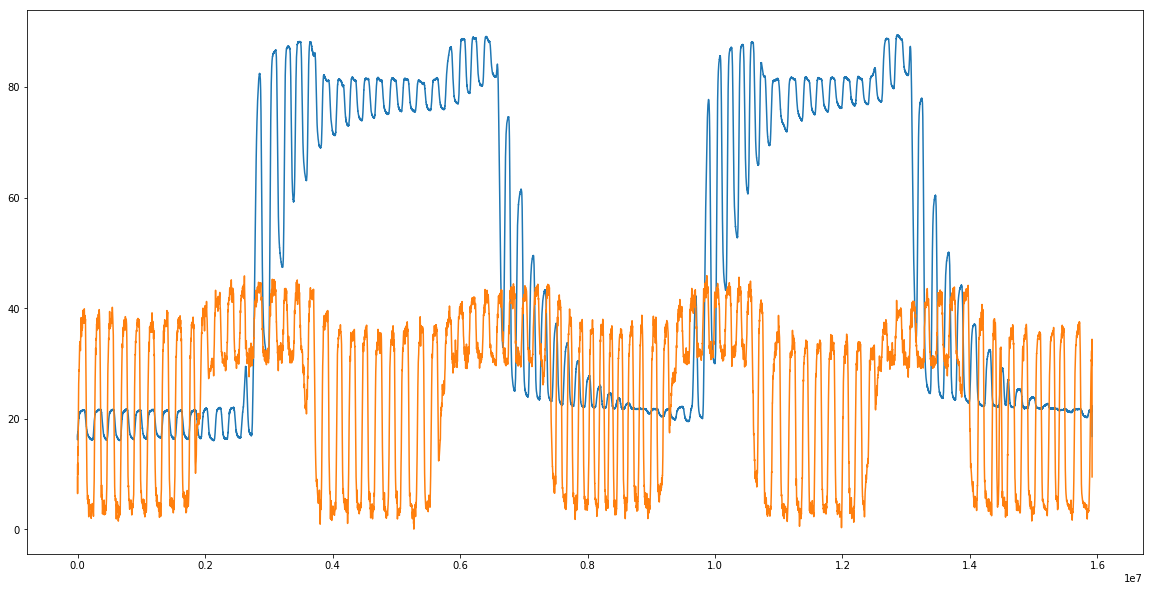

In [28]:
# Time = sg.resample(data.Time, len(data.Time)*1000)
O2 = sg.resample(data.O2, len(data.O2)*1000)
CO2 = sg.resample(data.CO2, len(data.CO2)*1000)
plt.figure(figsize=(20,10))
plt.plot(O2)
plt.plot(CO2)
t_step = data.Time[len(data.Time)-1]/len(O2)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


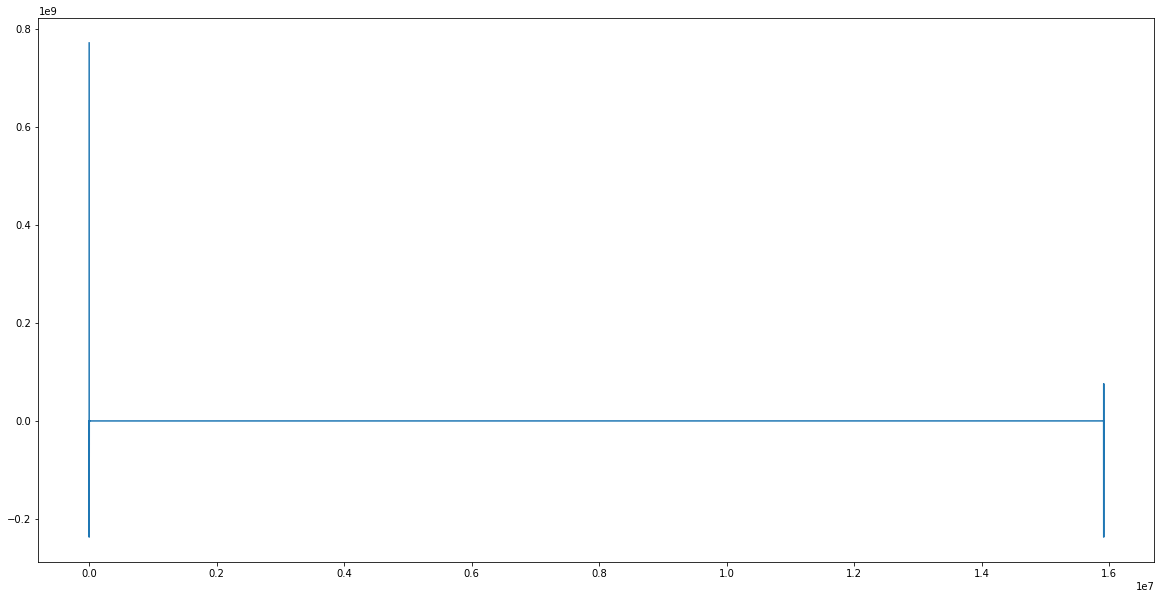

In [29]:
freq, power, disp = analysis.fourier_trans(t_step, O2)
plt.figure(figsize=(20,10))
plt.plot(power)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


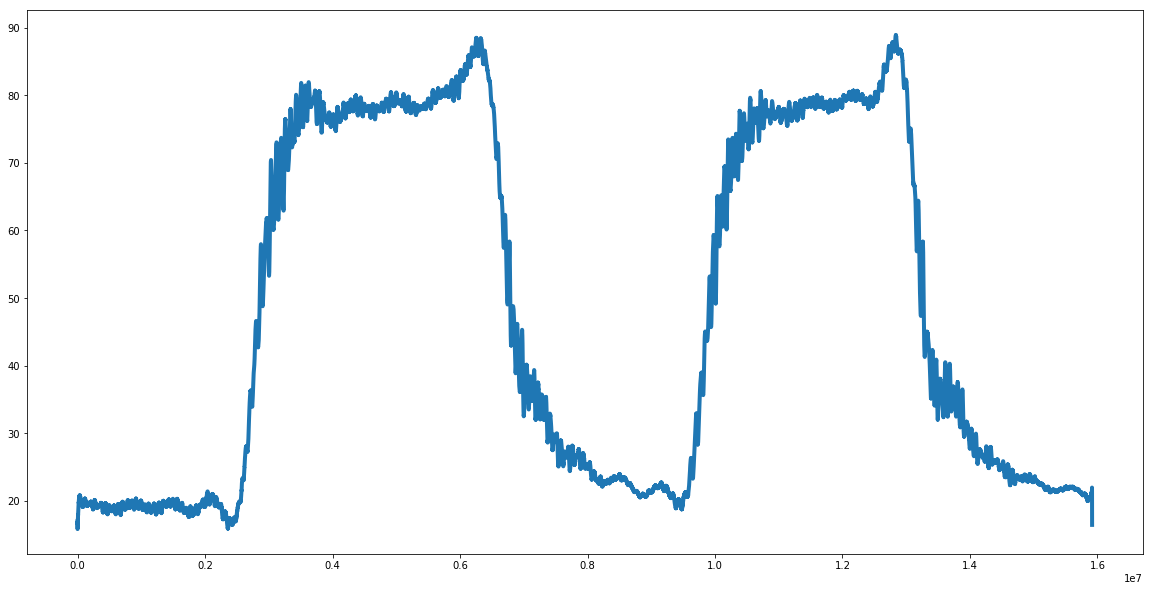

In [33]:
plt.figure(figsize=(20,10))
plt.plot(ifft(analysis.filter(3,20, freq, power)), linewidth = 4)

resample_inverse = ifft(analysis.filter(3,20, freq, power))
np.savetxt("O2_resample.txt", sg.resample(resample_inverse, 640), delimiter='\n')

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


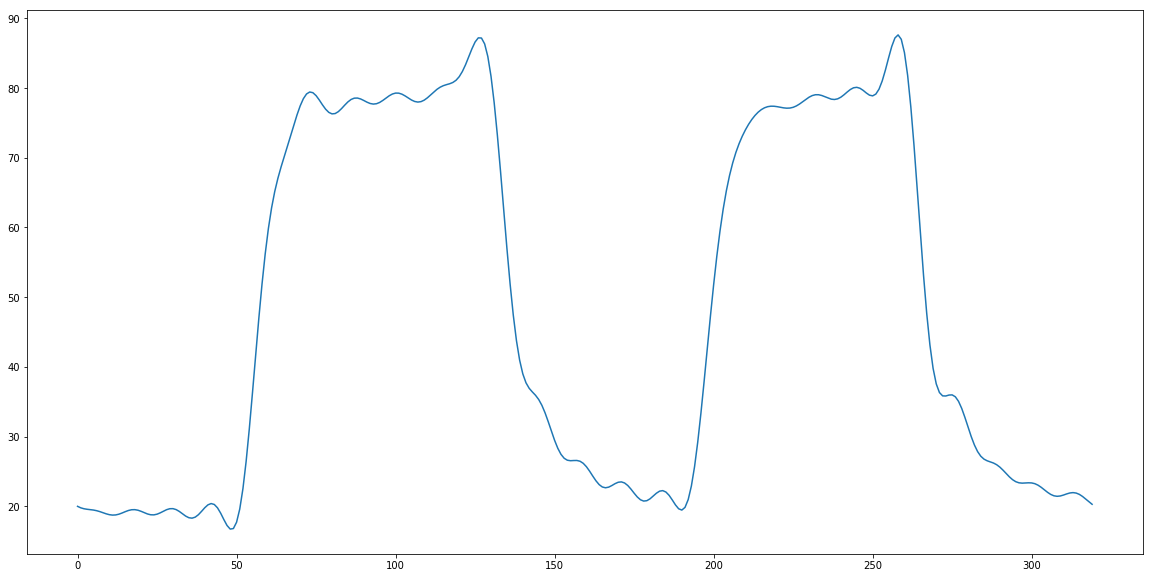

In [31]:
plt.figure(figsize=(20,10))
plt.plot(filtered_data)